In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
Olympic = pd.read_csv("../Data/Olympic.csv")
Olympic.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Medal
0,A Lamusi,M,23,170,60.0,China,CHN,2012,None
1,Juhamatti Tapio Aaltonen,M,28,184,85.0,Finland,FIN,2014,Bronze
2,Andreea Aanei,F,22,170,125.0,Romania,ROU,2016,None
3,Jamale (Djamel-) Aarrass (Ahrass-),M,30,187,76.0,France,FRA,2012,None
4,Nstor Abad Sanjun,M,23,167,64.0,Spain,ESP,2016,None


In [3]:
#1.1 데이터 행과 열 개수 확인하시오.

print(Olympic.shape)


(35018, 9)


In [4]:
#1.2 중복제거 후 행과 열 개수 확인하시오.
#중복 기준은 특정 컬럼이아닌 전체 컬럼에 대한 값이 같으면 중복 행으로 생각

Olympic[~Olympic.duplicated()].shape

(27721, 9)

In [5]:
#1.3 데이터 인덱스(index) 확인하시오.
#인덱스 확인전에 .reset_index(drop=True) 실행 후 진행 할 것
Olympic.reset_index(drop=True)

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Medal
0,A Lamusi,M,23,170,60.0,China,CHN,2012,None
1,Juhamatti Tapio Aaltonen,M,28,184,85.0,Finland,FIN,2014,Bronze
2,Andreea Aanei,F,22,170,125.0,Romania,ROU,2016,None
3,Jamale (Djamel-) Aarrass (Ahrass-),M,30,187,76.0,France,FRA,2012,None
4,Nstor Abad Sanjun,M,23,167,64.0,Spain,ESP,2016,None
...,...,...,...,...,...,...,...,...,...
35013,Dominik ycki,M,38,192,95.0,Poland,POL,2012,None
35014,ukasz Tomasz ygado,M,32,200,89.0,Poland,POL,2012,None
35015,Olga Igorevna Zyuzkova,F,33,171,69.0,Belarus,BLR,2016,None
35016,Piotr ya,M,27,176,59.0,Poland,POL,2014,None


In [6]:
Olympic.index

RangeIndex(start=0, stop=35018, step=1)

In [7]:
#1.4 데이터 컬럼(column) 확인하시오.
Olympic.columns


Index(['Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Year',
       'Medal'],
      dtype='object')

In [8]:
#1.5 데이터 변수 형식 확인하시오.
Olympic.dtypes

Name       object
Sex        object
Age         int64
Height      int64
Weight    float64
Team       object
NOC        object
Year        int64
Medal      object
dtype: object

In [9]:
#1.6 데이터 타입과 각 변수별 아이템 개수 확인하시오.
Olympic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35018 entries, 0 to 35017
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    35018 non-null  object 
 1   Sex     35018 non-null  object 
 2   Age     35018 non-null  int64  
 3   Height  35018 non-null  int64  
 4   Weight  35018 non-null  float64
 5   Team    35018 non-null  object 
 6   NOC     35018 non-null  object 
 7   Year    35018 non-null  int64  
 8   Medal   35018 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 2.4+ MB


In [20]:
#2.1 Year별 Data수를 확인하시오.
Olympic.groupby('Year').size()

Year
2010     4378
2012    12524
2014     4673
2016    13443
dtype: int64

In [31]:
#2.2 NOC가 KOR인 선수들 별 출전 횟수를 출력하시오.
Olympic[Olympic['NOC']=="KOR"].groupby('Name')['Name'].count().sort_values(ascending=False).head()



Name
Kim Su-Myeon      8
Park Min-Soo      7
Park Seung-Hui    7
No Seon-Yeong     6
Park Tae-Hwan     6
Name: Name, dtype: int64

In [12]:
#2.3 Year가 2012이고 NOC가 KOR이며 Medal은 Gold인 선수들의 이름,나이,성별,키,몸무게,메달 을 출력하시오.
#임의의 object에 저장하여 head()를 이용해 출력할 것

df = Olympic[(Olympic['Year']==2012) & (Olympic['NOC']=='KOR')& (Olympic['Medal']=='Gold')]
df

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Medal
5178,Choi Hyeon-Ju,F,27,172,65.0,South Korea,KOR,2012,Gold
10840,Gu Bon-Gil,M,23,182,70.0,South Korea,KOR,2012,Gold
12813,Hwang Gyeong-Seon,F,26,175,67.0,South Korea,KOR,2012,Gold
13821,Jin Jong-O,M,32,175,78.0,South Korea,KOR,2012,Gold
13822,Jin Jong-O,M,32,175,78.0,South Korea,KOR,2012,Gold
14943,Ki Bo-Bae,F,24,167,57.0,South Korea,KOR,2012,Gold
14944,Ki Bo-Bae,F,24,167,57.0,South Korea,KOR,2012,Gold
15089,Kim Hyeon-Wu,M,23,173,80.0,South Korea,KOR,2012,Gold
15098,Kim Jae-Beom,M,27,180,78.0,South Korea,KOR,2012,Gold
15102,Kim Jang-Mi,F,19,160,53.0,South Korea,KOR,2012,Gold


In [13]:
df[['Name','Age','Height','Weight','Medal']].head()

,Name,Age,Height,Weight,Medal
5178,Choi Hyeon-Ju,27,172,65.0,Gold
10840,Gu Bon-Gil,23,182,70.0,Gold
12813,Hwang Gyeong-Seon,26,175,67.0,Gold
13821,Jin Jong-O,32,175,78.0,Gold
13822,Jin Jong-O,32,175,78.0,Gold


In [14]:
#위 데이터를 이용하여 DataFrame의 간단한 통계 정보를 출력할 것
df.describe()

,Age,Height,Weight,Year
count,18.000000,18.000000,18.000000,18.0
mean,26.500000,173.055556,70.000000,2012.0
std,4.147997,7.673271,12.546385,0.0
min,19.000000,159.000000,53.000000,2012.0
25%,24.000000,167.000000,59.000000,2012.0
50%,27.000000,175.000000,68.500000,2012.0
75%,29.750000,179.500000,78.000000,2012.0
max,33.000000,182.000000,100.000000,2012.0


In [38]:
#2.4 Medal이 Gold, Silver이며 NOC가 KOR,USA,CHN인 데이터만 head()로 출력하시오.
Olympic[((Olympic['Medal']=="Gold") | (Olympic['Medal']=="Silver")) & ((Olympic['NOC'] == "KOR")|(Olympic['NOC'] == "USA")|(Olympic['NOC'] == "CHN"))].head()

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Medal
266,Nathan Ghar-Jun Adrian,M,23,198,100.0,United States,USA,2012,Gold
267,Nathan Ghar-Jun Adrian,M,23,198,100.0,United States,USA,2012,Silver
268,Nathan Ghar-Jun Adrian,M,23,198,100.0,United States,USA,2012,Gold
271,Nathan Ghar-Jun Adrian,M,27,198,100.0,United States,USA,2016,Gold
272,Nathan Ghar-Jun Adrian,M,27,198,100.0,United States,USA,2016,Gold


In [ ]:
#문제 3. 데이터 시각화

In [39]:
Olympic_viz = pd.read_csv('../Data/Olympic_viz.csv')
Olympic_viz.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Medal
0,Luc Abalo,M,27,182,86.0,France,FRA,2012,Gold
1,Luc Abalo,M,31,182,86.0,France,FRA,2016,Silver
2,Jeremy Abbott,M,28,175,70.0,United States,USA,2014,Bronze
3,Jennifer Abel,F,20,160,62.0,Canada,CAN,2012,Bronze
4,Denis Mikhaylovich Ablyazin,M,19,161,62.0,Russia,RUS,2012,Bronze


In [4]:
#3.1 Seaborn countplot을 이용하여 NOC별 메달 수를 그리시오.
from plotnine import *


In [64]:
Olympic_viz = pd.read_csv('../Data/Olympic_viz.csv')
Olympic_viz.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Medal
0,Luc Abalo,M,27,182,86.0,France,FRA,2012,Gold
1,Luc Abalo,M,31,182,86.0,France,FRA,2016,Silver
2,Jeremy Abbott,M,28,175,70.0,United States,USA,2014,Bronze
3,Jennifer Abel,F,20,160,62.0,Canada,CAN,2012,Bronze
4,Denis Mikhaylovich Ablyazin,M,19,161,62.0,Russia,RUS,2012,Bronze


In [12]:
Olympic_viz.groupby('NOC').count()['Name']

NOC
BRA    108
CAN    300
CHN    269
FRA    209
GBR    277
GER    343
KOR    119
NED    156
RUS    337
USA    672
Name: Name, dtype: int64

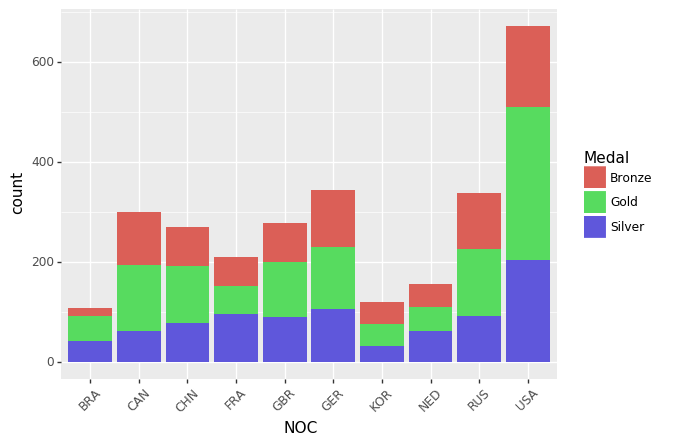

<ggplot: (-9223371871963132952)>

In [17]:
#3.1 Seaborn countplot을 이용하여 NOC별 메달 수를 그리시오
(ggplot(Olympic_viz, aes(x = 'NOC', fill='Medal')) + geom_bar() + theme(axis_text_x=element_text(angle=45)))

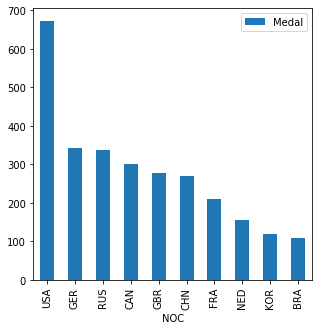

In [33]:
#3.2 Seaborn countplot을 이용하여 NOC별 메달 수를 높은순으로 다음과 같이 그리시오.
Olympic_viz.groupby('NOC').count().sort_values(['Medal'],ascending=False)[['Medal']].plot(kind='bar', figsize=(5,5))


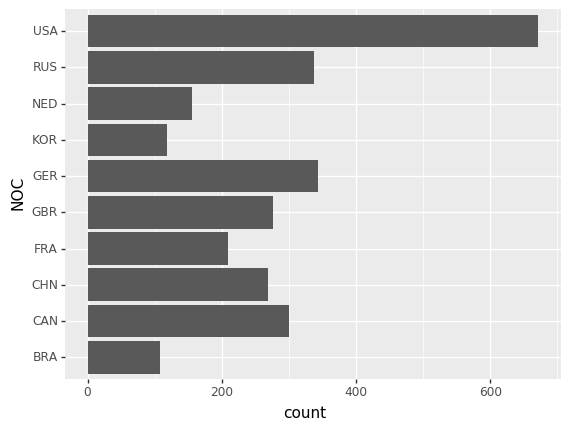

<ggplot: (-9223371871960929328)>

In [55]:
#3.3 Seaborn countplot을 이용하여 NOC별 메달 수를 높은순으로 다음과 같이 그리시오
ggplot(Olympic_viz, aes(x='NOC')) +geom_bar()+coord_flip()

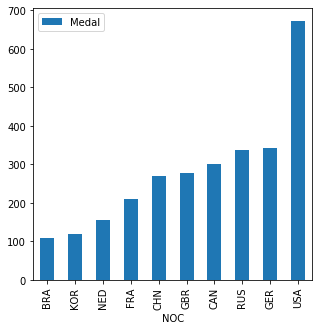

In [34]:
#3.4 Seaborn countplot을 이용하여 NOC별 메달 수를 낮은순으로 다음과 같이 그리시오.
Olympic_viz.groupby('NOC').count().sort_values(['Medal'],ascending=True)[['Medal']].plot(kind='bar', figsize=(5,5))

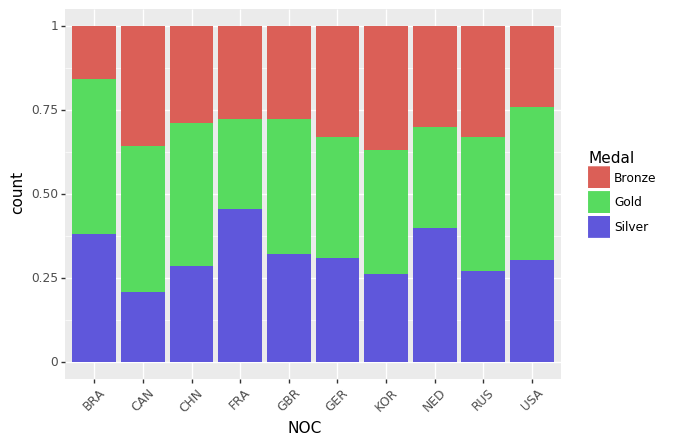

<ggplot: (-9223371871961114144)>

In [68]:
#3.5 NOC별 메달 수를 비율로 다음과 같이 출력 후 시각화 하시오.

(ggplot(Olympic_viz, aes(x = 'NOC', fill='Medal')) + geom_bar(position="fill") + theme(axis_text_x=element_text(angle=45)))